<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/MLFlowTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.4/741.4 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 12.0 MB/s eta 0:00:00


In [ ]:
pip install pyngrok

In [ ]:
#tracking UI in the background
#STEP 1 - RUNNING THE UI
get_ipython().system_raw("mlflow ui --port 5000 &")

#remote tunnel
from pyngrok import ngrok

#terminate existing tunnesl
ngrok.kill()

#set authentication
NGROK_AUTH_TOKEN = "1UvyiPNccly7FOh6ufIaMuOxhzL_5vg66ozBiVz4duYsPFLAk"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#opent the tunnel
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls = True)
print("MLFlow Tracking UI:", ngrok_tunnel.public_url)

MLFlow Tracking UI: https://eb2a009ca8cd.ngrok-free.app


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Define class names for CIFAR-10
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


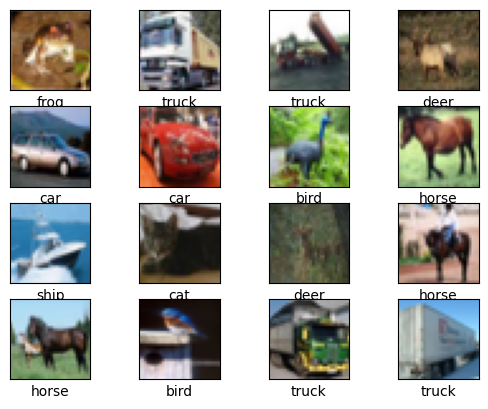

In [ ]:
# Display sample images from the dataset
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
batch_size = 32
buffer_size = 10000 # For shuffling

    #.batch(batch_size) \
# Create training dataset
total_training_dataset = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .shuffle(buffer_size) \
    .prefetch(tensorflow.data.AUTOTUNE)
#get a validation dataset of 0.2
# Calculate split sizes
TRAIN_SIZE = x_train.shape[0]
VALIDATION_SPLIT = 0.2
validation_size = int(TRAIN_SIZE * VALIDATION_SPLIT)
train_size_for_split = TRAIN_SIZE - validation_size
print(f"\nTotal training samples: {TRAIN_SIZE}")
print(f"Validation samples: {validation_size}")
print(f"Training samples after split: {train_size_for_split}")


Total training samples: 50000
Validation samples: 10000
Training samples after split: 40000


In [ ]:
training_dataset = total_training_dataset.take(train_size_for_split)
# The remaining `validation_size` elements go to the validation set
validation_dataset = total_training_dataset.skip(train_size_for_split)

training_dataset = training_dataset.batch(batch_size).prefetch(tensorflow.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size).prefetch(tensorflow.data.AUTOTUNE)


In [ ]:
# Create validation dataset
testing_dataset = tensorflow.data.Dataset.from_tensor_slices((x_test, y_test)) \
        .batch(batch_size) \
        .prefetch(tensorflow.data.AUTOTUNE)

In [ ]:
for images_batch, labels_batch in testing_dataset.take(1):
    print(f"Shape of images in one batch: {images_batch.shape}")
    print(f"Shape of labels in one batch: {labels_batch.shape}")

Shape of images in one batch: (32, 32, 32, 3)
Shape of labels in one batch: (32, 1)


In [ ]:
# STEP 2 - create and set the experiment
import mlflow

experiment_id = mlflow.create_experiment(name = "cifar_100_cnn")



In [ ]:
# STEP 3 - set the experiment as the running experiment
mlflow.set_experiment(experiment_name = "cifar_100_cnn")

<Experiment: artifact_location='file:///content/mlruns/156698187611096544', creation_time=1752592833405, experiment_id='156698187611096544', last_update_time=1752592833405, lifecycle_stage='active', name='cifar_100_cnn', tags={}>

In [ ]:
#train and log the model
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec, Schema, TensorSpec

In [ ]:
# STEP 4 introduce hyperopt
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

search_space = {
    'learning_rate': hp.loguniform('learning_rate', -10, -8)  # use learning rates between 10^-5 and 1
    #'activation': hp.choice('activation', ['relu', 'tanh', 'sigmoid']), # Activation function
    #'batch_size': hp.choice('batch_size', [32, 64, 128]),#use sample batch sizes
    #'optimizer': hp.choice('optimizer', ['adam', 'sgd', 'rmsprop'])
}

In [ ]:
# Define a function to perform hyperparameter optimization with Hyperopt
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec, Schema, TensorSpec

In [ ]:
import tensorflow.keras as keras
# new logs to an existing file. If false, it will overwrite.
csv_logger = keras.callbacks.CSVLogger('cifar10_logs.csv', separator=',', append=False)


In [ ]:
# STEP 5 specify the saving of the model (logs of the model)
mlflow.tensorflow.autolog(log_models = False)

In [ ]:
#check the data dimensions
# Get one element from the dataset
# `next(iter(dataset))` gets the first element from the dataset
one_feature, one_label = next(iter(training_dataset))

print("Shape of a single feature:", one_feature.shape)
print("Shape of a single label:", one_label.shape)

Shape of a single feature: (32, 32, 32, 3)
Shape of a single label: (32, 1)


In [ ]:
# STEP 6 build the model in an objective function
def train_cifar10(params):
  with mlflow.start_run(nested = True):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Choose optimizer based on params
    """
    if params['optimizer'] == 'adam':
      optimizer = tensorflow.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'sgd':
      optimizer = tensorflow.keras.optimizers.SGD(learning_rate=params['learning_rate'])
    else:
      optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=params['learning_rate'])
      """

    model.compile(tensorflow.keras.optimizers.Adam(learning_rate=params['learning_rate']), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #history = model.fit(training_images, training_labels, epochs=10, validation_split=0.2, batch_size=params['batch_size'])
    history = model.fit(training_dataset, epochs=10, validation_data=validation_dataset)
    # STEP 7 log the params
    mlflow.log_params(params)
    #get the input and output schema of the model for signature
    input_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 32, 32,3))])
    output_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 10))])

    #STEP 8 - SETUP THE SIGNATURE
    signature = ModelSignature(inputs = input_schema, outputs = output_schema)
    # STEP 9 Log the trained model
    mlflow.tensorflow.log_model(model, "cifar_10_model",signature = signature)

    # We want to minimize the validation loss
    validation_loss = history.history['val_loss'][-1]
    # Hyperopt expects a dictionary with 'loss' and 'status'
    return {'loss': validation_loss, 'status': STATUS_OK}

In [ ]:
trials = Trials()
with mlflow.start_run():
    best_result = fmin(
        fn = train_cifar10,
        space = search_space,
        algo = tpe.suggest,#Tree-structured Parzen Estimator algorithm
        max_evals = 2,
        trials=trials
    )

  0%|          | 0/2 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/10

   1/1250 ━━━━━━━━━━━━━━━━━━━━ 1:00:00 3s/step - accuracy: 0.0938 - loss: 2.3068
   2/1250 ━━━━━━━━━━━━━━━━━━━━ 1:39 80ms/step - accuracy: 0.0859 - loss: 2.3086 
   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:37 78ms/step - accuracy: 0.0851 - loss: 2.3072
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 1:36 77ms/step - accuracy: 0.0814 - loss: 2.3066
   5/1250 ━━━━━━━━━━━━━━━━━━━━ 1:34 76ms/step - accuracy: 0.0789 - loss: 2.3061
   6/1250 ━━━━━━━━━━━━━━━━━━━━ 1:31 74ms/step - accuracy: 0.0770 - loss: 2.3057
   7/1250 ━━━━━━━━━━━━━━━━━━━━ 1:30 73ms/step - accuracy: 0.0743 - loss: 2.3059
   8/1250 ━━━━━━━━━━━━━━━━━━━━ 1:28 72ms/step - accuracy: 0.0728 - loss: 2.3059
   9/1250 ━━━━━━━━━━━━━━━━━━━━ 1:29 72ms/step - accuracy: 0.0724 - loss: 2.3057
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 1:29 72ms/step - accuracy: 0.0727 - loss: 2.3057
  11/1250 ━━━━━━━━━━━━━━━━━━━━ 1:29 72ms/step - accuracy: 0.0736 - loss: 2.3056
  12/1250 ━━━━━━━━━━━━━━━━━━━━ 1:29 72ms/step - accuracy: 0.0744 - loss: 2.3054
  13/1250 ━━━━━━━━━━━━━━━━

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 71ms/step - accuracy: 0.2393 - loss: 2.0453 - val_accuracy: 0.4283 - val_loss: 1.6102

Epoch 2/10

   1/1250 ━━━━━━━━━━━━━━━━━━━━ 2:50 137ms/step - accuracy: 0.3750 - loss: 1.9517
   2/1250 ━━━━━━━━━━━━━━━━━━━━ 1:25 68ms/step - accuracy: 0.3984 - loss: 1.8410 
   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:18 63ms/step - accuracy: 0.3941 - loss: 1.8140
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 1:22 66ms/step - accuracy: 0.3874 - loss: 1.7907
   5/1250 ━━━━━━━━━━━━━━━━━━━━ 1:23 67ms/step - accuracy: 0.3824 - loss: 1.7830
   6/1250 ━━━━━━━━━━━━━━━━━━━━ 1:26 70ms/step - accuracy: 0.3812 - loss: 1.7748
   7/1250 ━━━━━━━━━━━━━━━━━━━━ 1:27 70ms/step - accuracy: 0.3822 - loss: 1.7628
   8/1250 ━━━━━━━━━━━━━━━━━━━━ 1:27 70ms/step - accuracy: 0.3832 - loss: 1.7520
   9/1250 ━━━━━━━━━━━━━━━━━━━━ 1:27 70ms/step - accuracy: 0.3858 - loss: 1.7395
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 1:27 71ms/step - accuracy: 0.3875 - loss: 1.7294
  11/1250 ━━━━━━━━━━━━━━━━━━━━ 1:26 70ms/step - accuracy: 0.3900

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - accuracy: 0.4341 - loss: 1.5614 - val_accuracy: 0.4622 - val_loss: 1.4916

Epoch 3/10

   1/1250 ━━━━━━━━━━━━━━━━━━━━ 14:04:07 41s/step - accuracy: 0.4688 - loss: 1.6499
   2/1250 ━━━━━━━━━━━━━━━━━━━━ 1:10 57ms/step - accuracy: 0.4766 - loss: 1.6156   
   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:10 57ms/step - accuracy: 0.4705 - loss: 1.5884
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 1:11 57ms/step - accuracy: 0.4740 - loss: 1.5690
   5/1250 ━━━━━━━━━━━━━━━━━━━━ 1:11 57ms/step - accuracy: 0.4792 - loss: 1.5518
   6/1250 ━━━━━━━━━━━━━━━━━━━━ 1:11 57ms/step - accuracy: 0.4826 - loss: 1.5475
   7/1250 ━━━━━━━━━━━━━━━━━━━━ 1:11 58ms/step - accuracy: 0.4832 - loss: 1.5444
   8/1250 ━━━━━━━━━━━━━━━━━━━━ 1:12 58ms/step - accuracy: 0.4819 - loss: 1.5440
   9/1250 ━━━━━━━━━━━━━━━━━━━━ 1:12 58ms/step - accuracy: 0.4820 - loss: 1.5408
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 1:13 59ms/step - accuracy: 0.4806 - loss: 1.5401
  11/1250 ━━━━━━━━━━━━━━━━━━━━ 1:12 59ms/step - accuracy: 0

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.4846 - loss: 1.4353 - val_accuracy: 0.4885 - val_loss: 1.4111

Epoch 4/10

   1/1250 ━━━━━━━━━━━━━━━━━━━━ 13:47:22 40s/step - accuracy: 0.5312 - loss: 1.2990
   2/1250 ━━━━━━━━━━━━━━━━━━━━ 1:07 54ms/step - accuracy: 0.5312 - loss: 1.3141   
   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:14 59ms/step - accuracy: 0.5278 - loss: 1.3257
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 1:20 64ms/step - accuracy: 0.5286 - loss: 1.3355
   5/1250 ━━━━━━━━━━━━━━━━━━━━ 1:24 68ms/step - accuracy: 0.5329 - loss: 1.3311
   6/1250 ━━━━━━━━━━━━━━━━━━━━ 1:23 67ms/step - accuracy: 0.5361 - loss: 1.3337
   7/1250 ━━━━━━━━━━━━━━━━━━━━ 1:22 67ms/step - accuracy: 0.5361 - loss: 1.3390
   8/1250 ━━━━━━━━━━━━━━━━━━━━ 1:22 66ms/step - accuracy: 0.5335 - loss: 1.3459
   9/1250 ━━━━━━━━━━━━━━━━━━━━ 1:21 66ms/step - accuracy: 0.5302 - loss: 1.3546
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 1:21 66ms/step - accuracy: 0.5275 - loss: 1.3609
  11/1250 ━━━━━━━━━━━━━━━━━━━━ 1:21 66ms/step - accuracy: 0

In [ ]:
#check the best hyperparameters results
best_result

{'learning_rate': np.float64(0.000313607871211465)}

In [ ]:
import hyperopt

print(hyperopt.space_eval(search_space, best_result))

{'learning_rate': 0.000313607871211465}


In [ ]:
#access the model artifacts of the best running model
logged_model = f'runs:/861a1f6b36dd43199d50b0e22fb13764/cifar_10_model'

In [ ]:
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
one_feature, one_label = next(iter(testing_dataset))

print("Shape of a single feature:", one_feature.shape)
print("Shape of a single label:", one_label.shape)

Shape of a single feature: (32, 32, 3)
Shape of a single label: (1,)


In [ ]:
# Iterate through the dataset, convert to NumPy, and predict
predictions = []
for images, labels in testing_dataset:
    numpy_images = images.numpy() # Convert the tensor to a NumPy array
    # If your model expects a tuple (input, output) from the dataset,
    # ensure you only pass the input part (images in this case)
    batch_predictions = loaded_model.predict(numpy_images)
    predictions.append(batch_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━

In [ ]:
all_predictions = np.concatenate(predictions, axis=0)

print(np.argmax(all_predictions, axis=1))

[3 8 8 ... 5 4 7]


In [ ]:
#using the test dataset
from sklearn.metrics import accuracy_score

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testing_dataset:
        output = loaded_model.predict(inputs.numpy()) # Feed Network

        output = np.argmax(output, axis = 1).astype('float64').tolist()

        y_pred.extend(output)
        print(y_pred)

        #labels = [ x-1 for x in labels.numpy().tolist()]
        labels = [x[0] - 1 for x in labels.numpy().tolist()]

       # y_true.extend(labels)
        y_true.extend(labels)

acc = accuracy_score(y_true, y_pred)
print('Accuracy on test data:', acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[3.0, 8.0, 8.0, 0.0, 4.0, 6.0, 1.0, 6.0, 3.0, 1.0, 0.0, 9.0, 5.0, 7.0, 9.0, 6.0, 5.0, 3.0, 8.0, 6.0, 7.0, 2.0, 4.0, 9.0, 4.0, 5.0, 4.0, 2.0, 1.0, 6.0, 6.0, 5.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3.0, 8.0, 8.0, 0.0, 4.0, 6.0, 1.0, 6.0, 3.0, 1.0, 0.0, 9.0, 5.0, 7.0, 9.0, 6.0, 5.0, 3.0, 8.0, 6.0, 7.0, 2.0, 4.0, 9.0, 4.0, 5.0, 4.0, 2.0, 1.0, 6.0, 6.0, 5.0, 4.0, 3.0, 9.0, 3.0, 7.0, 9.0, 9.0, 5.0, 0.0, 6.0, 5.0, 6.0, 0.0, 9.0, 5.0, 5.0, 7.0, 6.0, 7.0, 8.0, 6.0, 3.0, 8.0, 8.0, 5.0, 5.0, 5.0, 3.0, 7.0, 5.0, 6.0, 2.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3.0, 8.0, 8.0, 0.0, 4.0, 6.0, 1.0, 6.0, 3.0, 1.0, 0.0, 9.0, 5.0, 7.0, 9.0, 6.0, 5.0, 3.0, 8.0, 6.0, 7.0, 2.0, 4.0, 9.0, 4.0, 5.0, 4.0, 2.0, 1.0, 6.0, 6.0, 5.0, 4.0, 3.0, 9.0, 3.0, 7.0, 9.0, 9.0, 5.0, 0.0, 6.0, 5.0, 6.0, 0.0, 9.0, 5.0, 5.0, 7.0, 6.0, 7.0, 8.0, 6.0, 3.0, 8.0, 8.0, 5.0, 5.0, 5.0, 3.0, 7.0, 5.0, 6.0, 2.0, 6.0, 2.0, 1.0, 0.0, 5.0, 7.0, 0.0, 6.0, 8.0, 8.0, 0.0, 2.0, 2.0, 3.0, 5.0, 8.0, 8.0

In [ ]:
len(testing_dataset)

313